

Consider only the below columns and prepare a prediction model for predicting Price.

**Corolla<-Corolla**:-"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [ ]:
car=pd.read_csv('/content/ToyotaCorolla.csv',encoding='Latin1')

In [ ]:
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# **EDA**

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
car_1=pd.concat([car.iloc[:,2:4],car.iloc[:,6:7],car.iloc[:,8:9],car.iloc[:,12:14],car.iloc[:,15:18]],axis=1)


In [ ]:
car_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car_1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
car_1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
car2=car_1.rename({'Price':"p","Age_08_04":"a","Doors":'d','Gears':'g',"Quarterly_Tax":'tax','Weight':'w'},axis=1)

In [ ]:
car2

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car2.shape

(1436, 9)

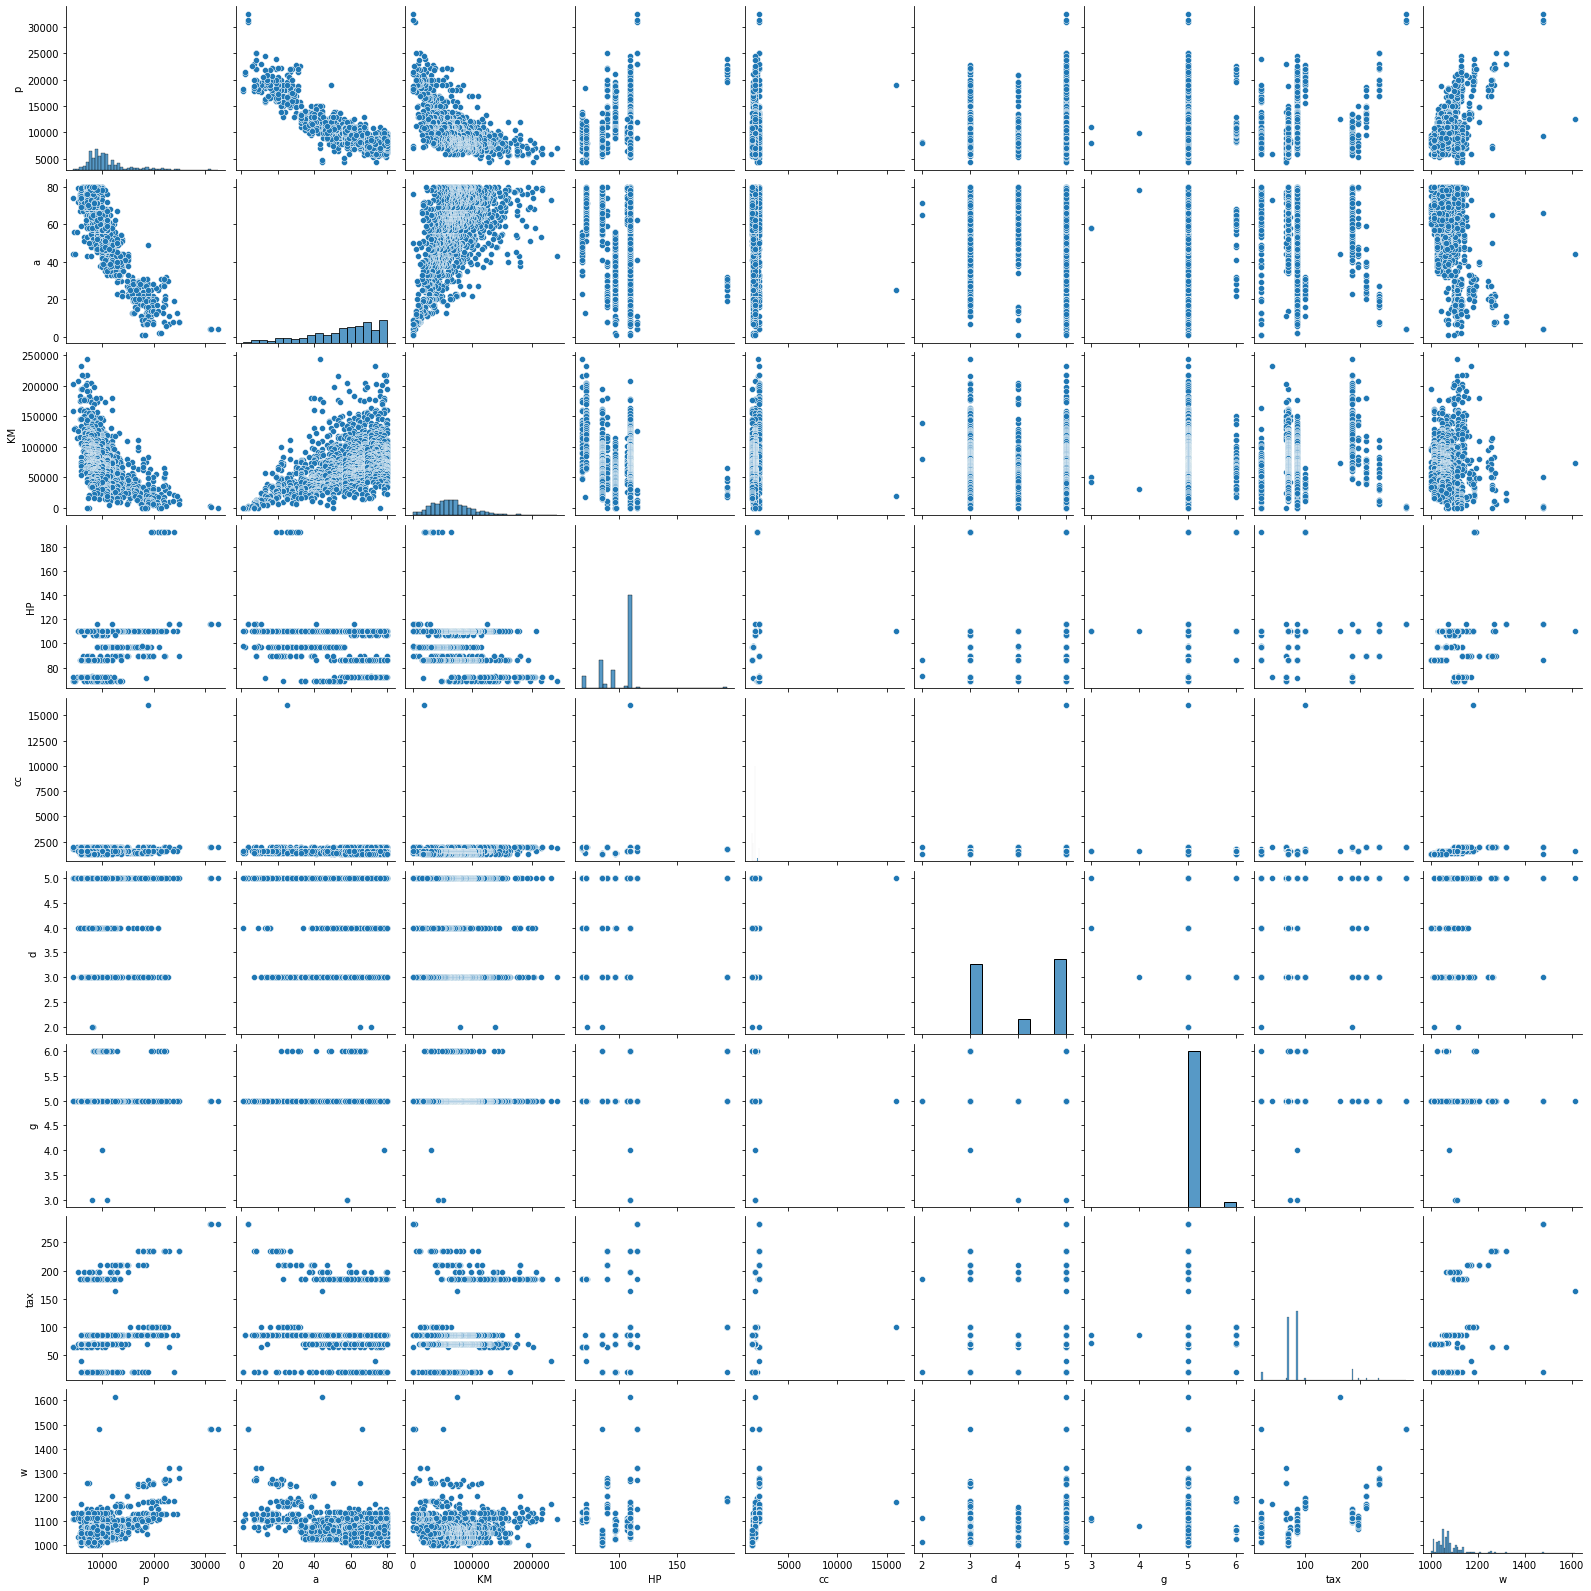

In [ ]:
sns.pairplot(car2)

In [ ]:
#fitting mlr model
model=smf.ols("p~a+KM+HP+cc+d+g+tax+w",data=car2).fit()

In [ ]:
model.params

Intercept   -5573.106358
a            -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
d              -1.616641
g             594.319936
tax             3.949081
w              16.958632
dtype: float64

In [ ]:
print(model.tvalues,'\n',np.round(model.pvalues,5))

Intercept    -3.948666
a           -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
d            -0.040410
g             3.016007
tax           3.014535
w            15.879803
dtype: float64 
 Intercept    0.00008
a            0.00000
KM           0.00000
HP           0.00000
cc           0.17909
d            0.96777
g            0.00261
tax          0.00262
w            0.00000
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj,model.aic)

(0.8637627463428191, 0.8629989775766962, 24769.07664007625)

***SLR***

In [ ]:
m_cc=smf.ols('p~cc',data=car2).fit()

In [ ]:
print(m_cc.pvalues)

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [ ]:
m_d=smf.ols('p~d',data=car2).fit()

In [ ]:
print(m_d.pvalues)

Intercept    1.094732e-73
d            1.461237e-12
dtype: float64


In [ ]:
m_d_cc=smf.ols('p~d+cc',data=car2).fit()

In [ ]:
print(m_d_cc.pvalues)



Intercept    1.056885e-34
d            1.373469e-11
cc           1.521992e-05
dtype: float64


# ***VIF***

In [ ]:
rsq_a = smf.ols('a~KM+HP+cc+d+g+tax+w',data=car2).fit().rsquared  
vif_a = 1/(1-rsq_a)

rsq_KM = smf.ols('KM~a+HP+cc+d+g+tax+w',data=car2).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~KM+a+cc+d+g+tax+w',data=car2).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~a+KM+HP+d+g+tax+w',data=car2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_d = smf.ols('d~KM+HP+cc+a+g+tax+w',data=car2).fit().rsquared  
vif_d = 1/(1-rsq_d)

rsq_g = smf.ols('g~KM+HP+cc+d+a+tax+w',data=car2).fit().rsquared  
vif_g = 1/(1-rsq_g)

rsq_tax = smf.ols('tax~KM+HP+cc+d+g+a+w',data=car2).fit().rsquared  
vif_tax = 1/(1-rsq_tax)

rsq_w = smf.ols('w~KM+HP+cc+d+g+tax+a',data=car2).fit().rsquared  
vif_w = 1/(1-rsq_w)

In [ ]:

print(vif_a,'age','\n',vif_KM,'km','\n',vif_HP,'hp','\n',vif_cc,'cc','\n',vif_d,'door','\n',vif_g,'gear','\n',vif_tax,'tax','\n',vif_w,'weight')


1.8846198056602872 age 
 1.7569047782042888 km 
 1.419422108631098 hp 
 1.1638939849423797 cc 
 1.156575207076043 door 
 1.0987230193470372 gear 
 2.311430811531038 tax 
 2.516419837445868 weight


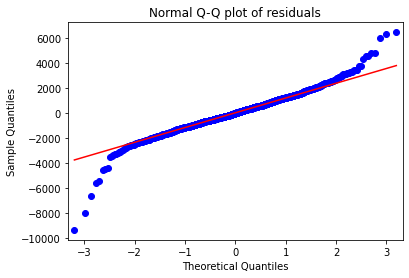

In [ ]:
#Q_Q PLOT
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

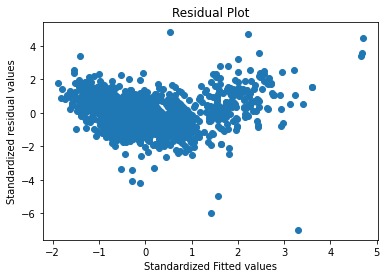

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# ***Regression plot***

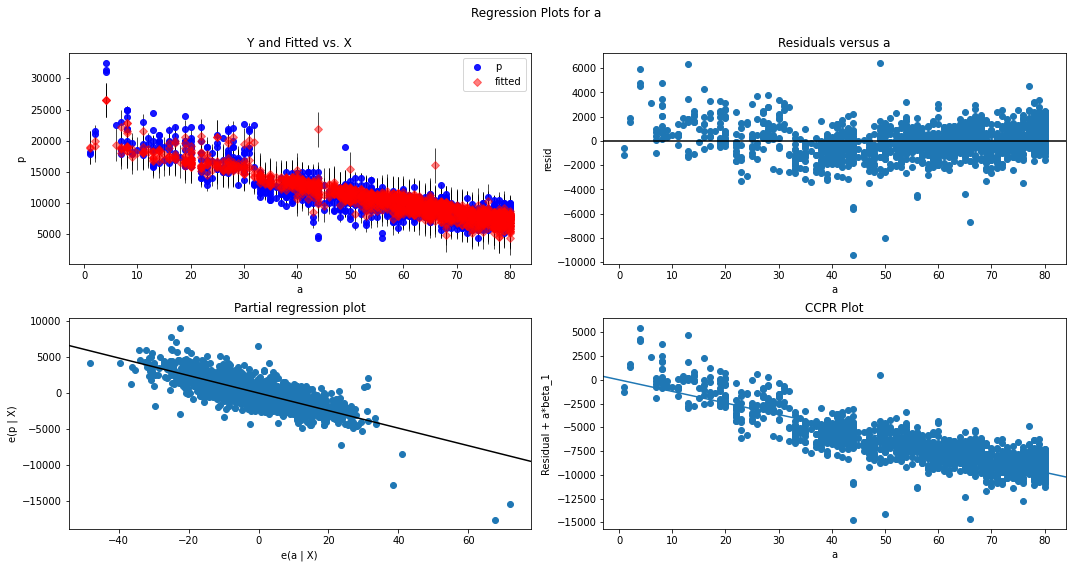

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "a", fig=fig)
plt.show()

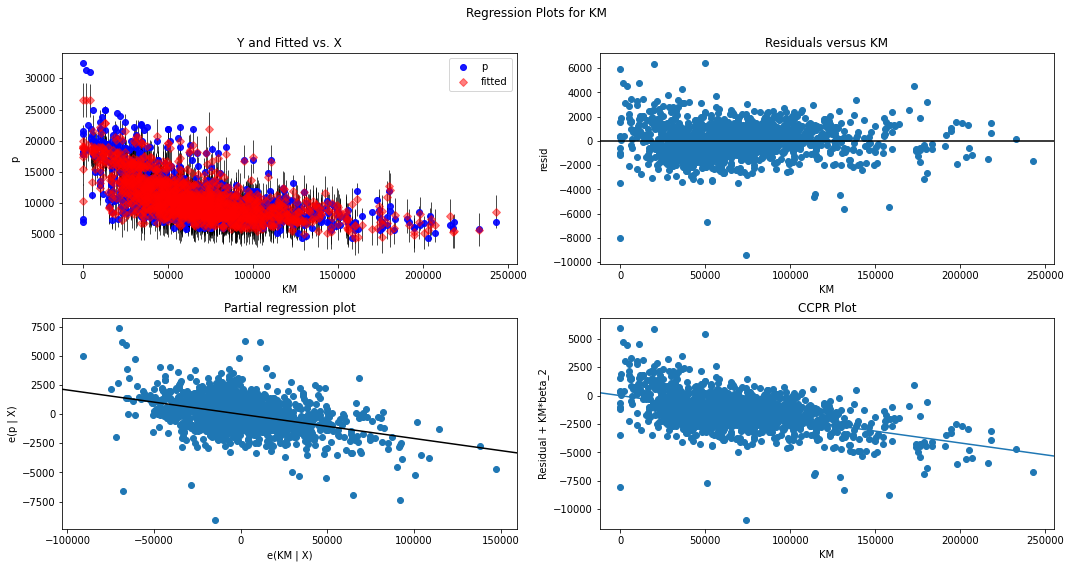

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

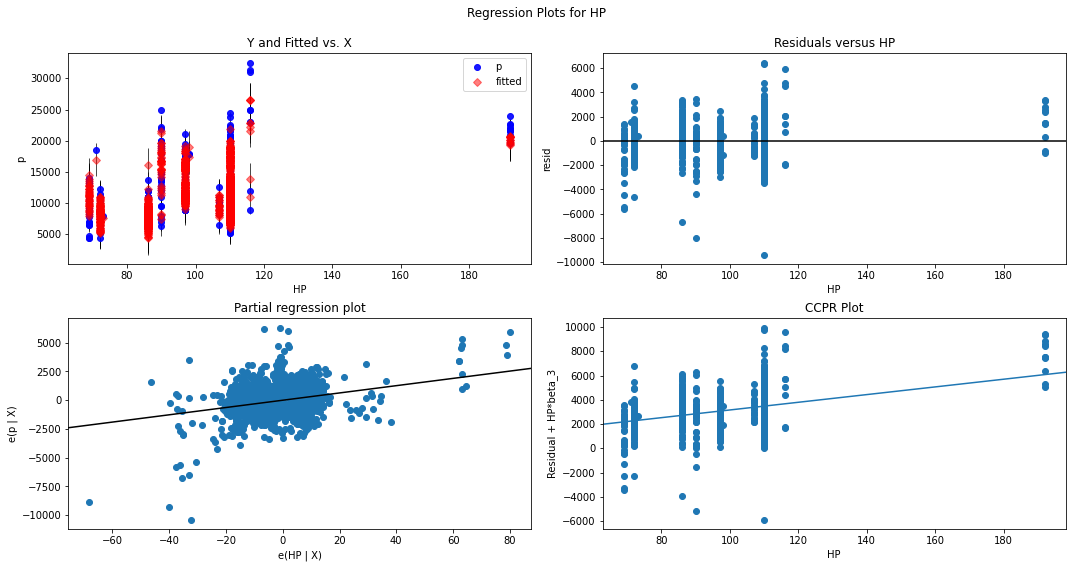

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

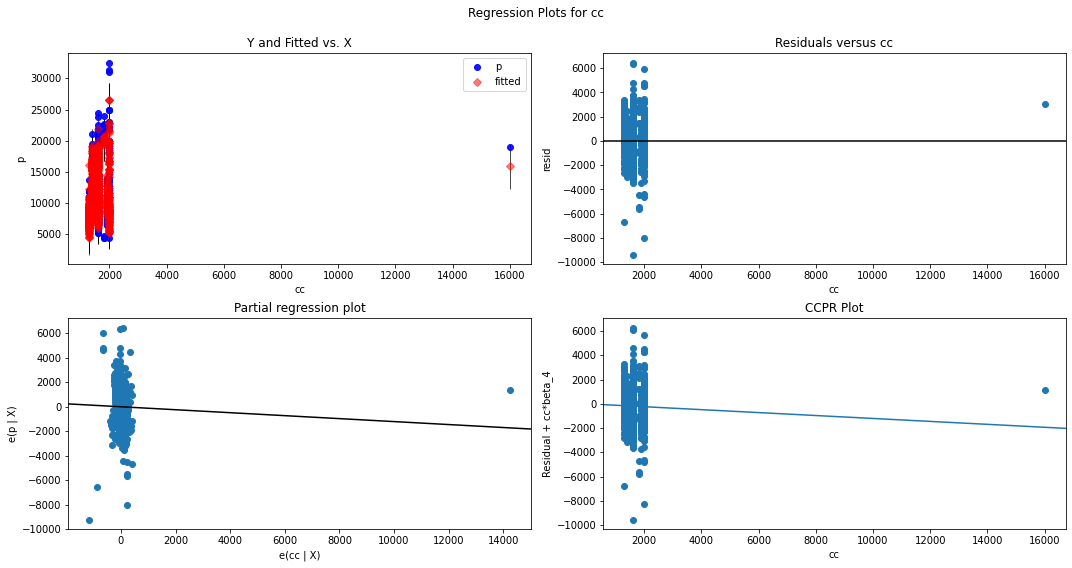

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

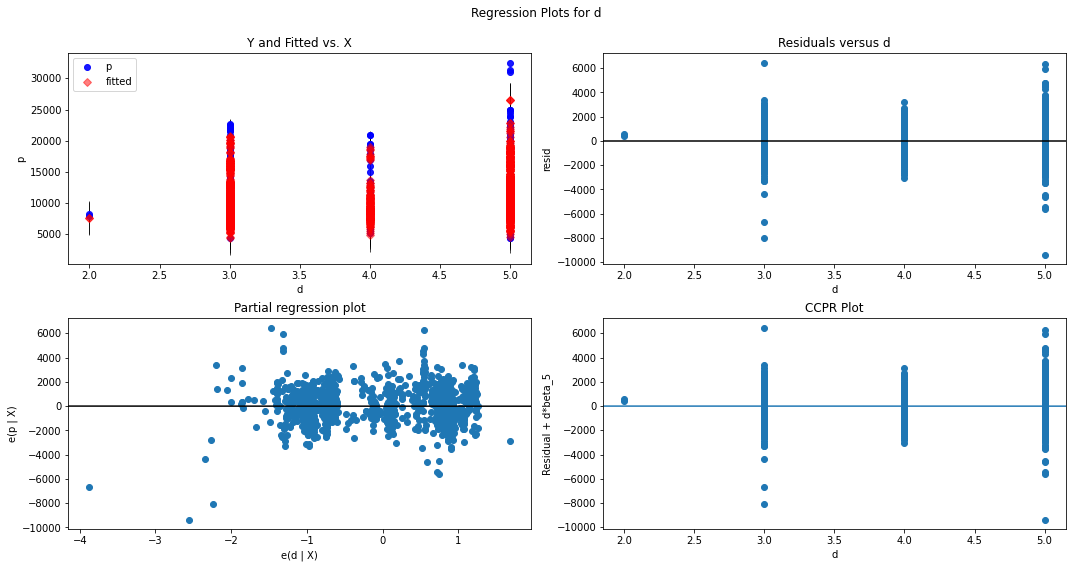

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "d", fig=fig)
plt.show()

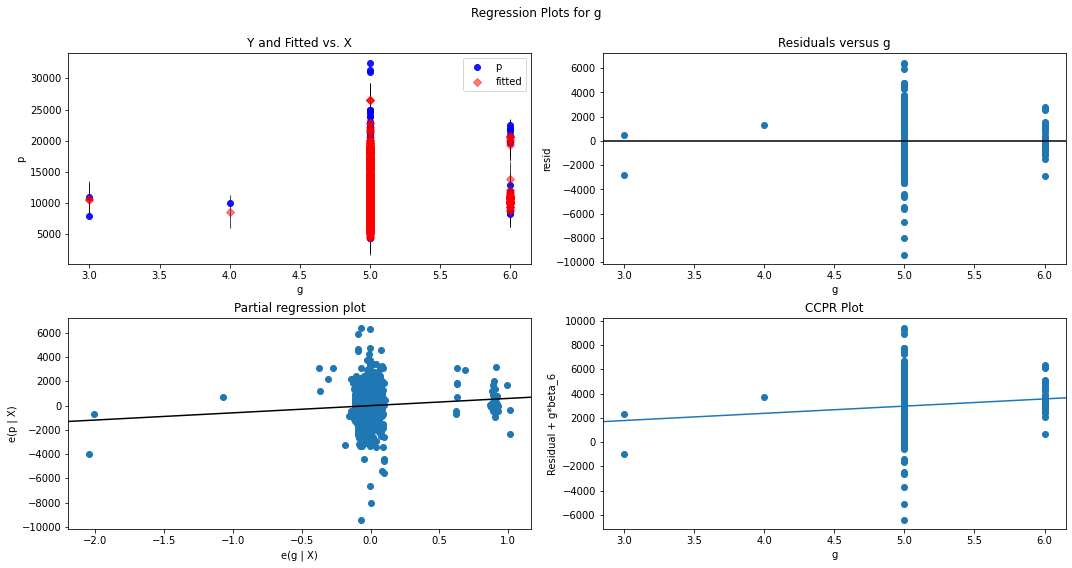

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "g", fig=fig)
plt.show()

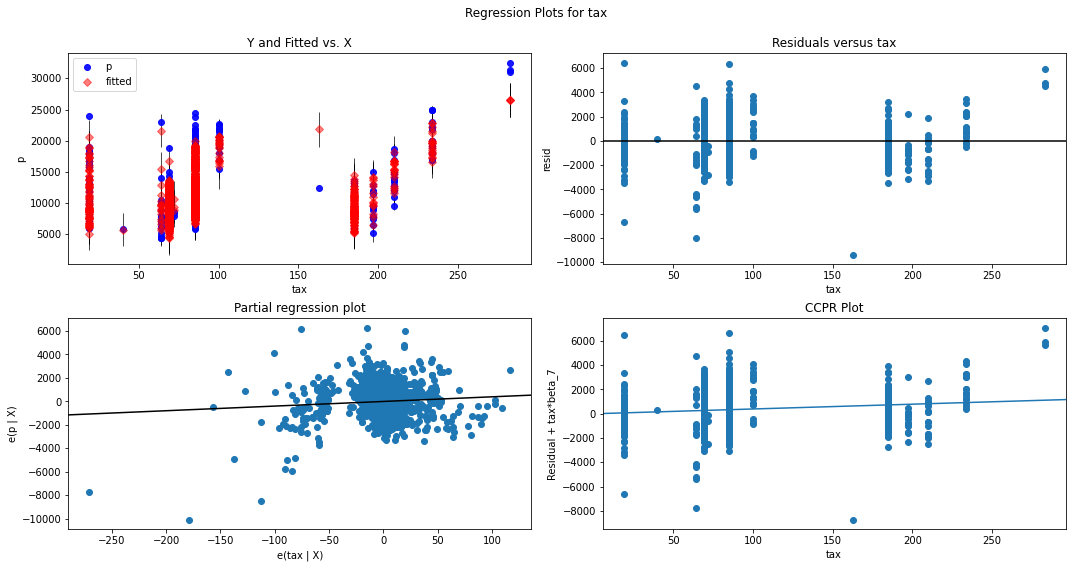

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "tax", fig=fig)
plt.show()

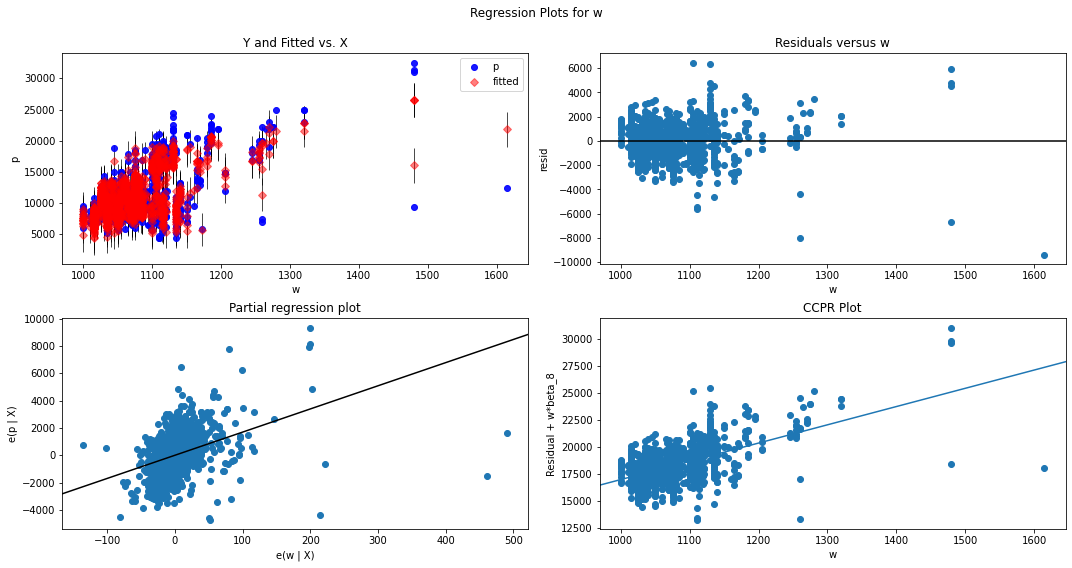

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "w", fig=fig)
plt.show()

# ***COOKS DISTANCE AND INFLUENCER POINTS***

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


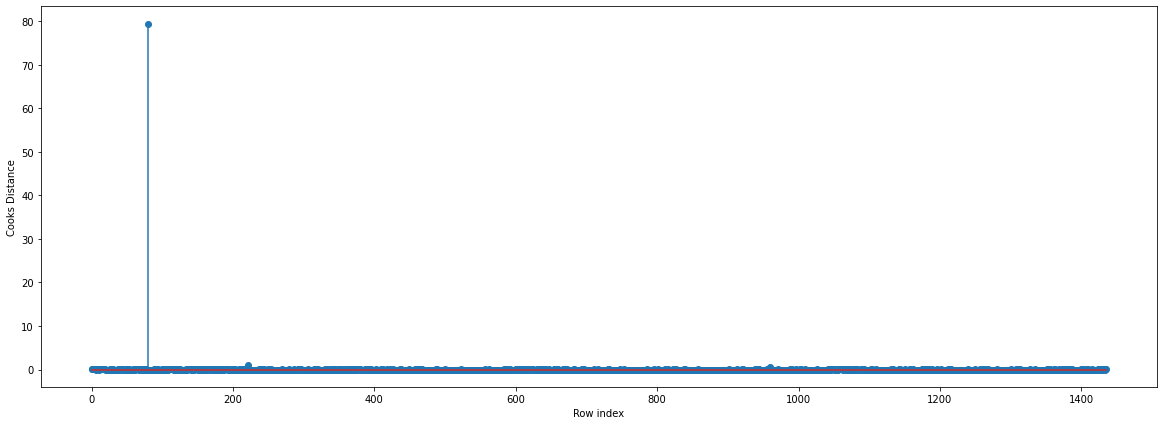

In [ ]:
#cook distance
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

In [ ]:
car_new=car2.copy()

In [ ]:
car_new

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car3=car_new.drop(car_new.index[[80]],axis=0).reset_index(drop=True)

In [ ]:
car3

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car3.shape

(1435, 9)

In [ ]:
#fitting model 
model2=smf.ols('p~a+KM+HP+cc+d+g+tax+w',data=car3).fit()

In [ ]:
(model2.rsquared,model2.aic)

(0.8693790488655819, 24687.28102432684)

In [ ]:
#cook distance
model_influence_a = model2.get_influence()
(c_a, _) = model_influence_a.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


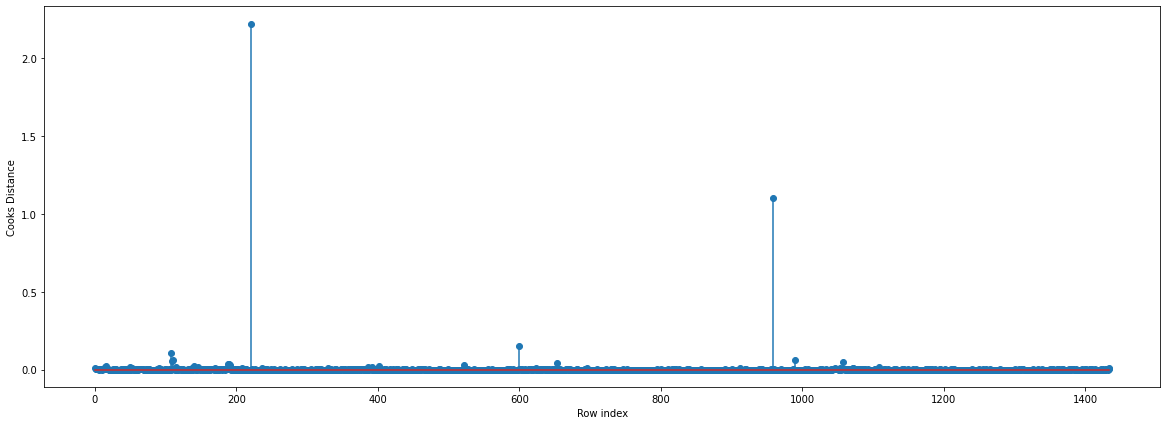

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_a),np.max(c_a))

(220, 2.2244611713010634)

In [ ]:
car_new1=car3.copy()

In [ ]:
car4=car_new1.drop(car_new1.index[[220]],axis=0).reset_index(drop=True)

In [ ]:
car4

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car4.shape

(1434, 9)

In [ ]:
#fiiting mlr model
model3=smf.ols('p~a+KM+HP+cc+d+g+tax+w',data=car4).fit()

In [ ]:
(model3.rsquared,model3.aic)

(0.8778445878599779, 24574.7766156388)

In [ ]:
#cooks distance
model_influence_b = model3.get_influence()
(c_b, _) = model_influence_b.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


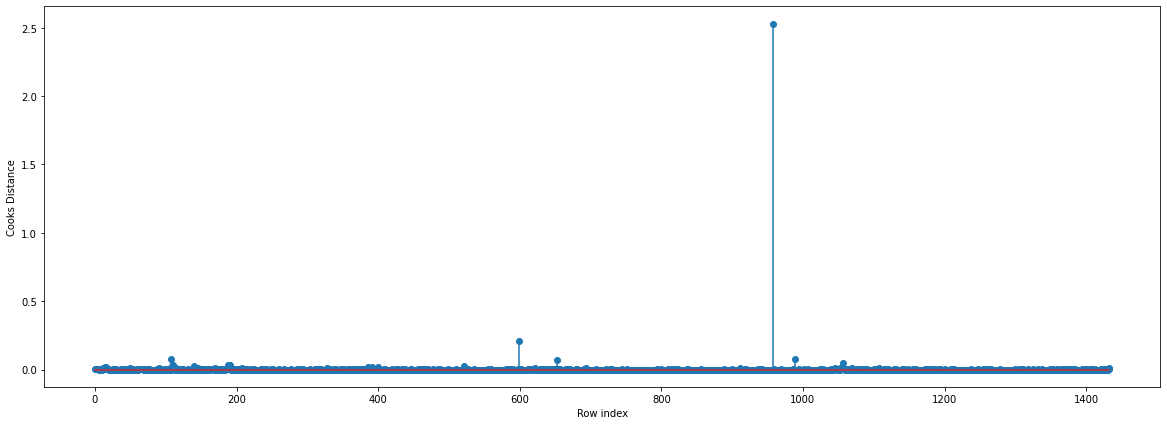

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_b,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_b),np.max(c_b))

(958, 2.531256693023216)

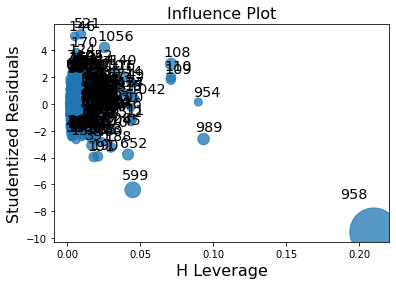

In [ ]:
# influence plot
influence_plot(model3)
plt.show()

In [ ]:
car_new2=car4.copy()



In [ ]:
car5=car_new2.drop(car_new2.index[[958,989,954,109,108]],axis=0).reset_index(drop=True)

In [ ]:
car5

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1424,7500,69,20544,86,1300,3,5,69,1025
1425,10845,72,19000,86,1300,3,5,69,1015
1426,8500,71,17016,86,1300,3,5,69,1015
1427,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car5.shape

(1429, 9)

In [ ]:
#mlr model
model4=smf.ols('p~a+KM+HP+cc+d+g+tax+w',data=car5).fit()

In [ ]:
(model4.rsquared,model4.aic)

(0.8806405291366138, 24391.311150955644)

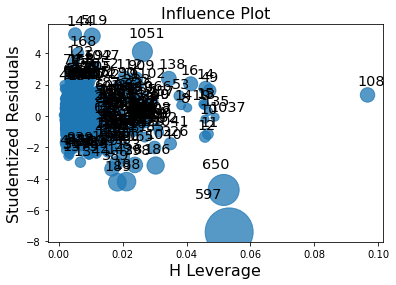

In [ ]:
#influence plot
influence_plot(model4)
plt.show()

In [ ]:
car_new3=car5.copy()

In [ ]:
car6=car_new3.drop(car_new2.index[[108,597,650]],axis=0).reset_index(drop=True)

In [ ]:
car6

,p,a,KM,HP,cc,d,g,tax,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1421,7500,69,20544,86,1300,3,5,69,1025
1422,10845,72,19000,86,1300,3,5,69,1015
1423,8500,71,17016,86,1300,3,5,69,1015
1424,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
car6.shape

(1426, 9)

In [ ]:
model5=smf.ols('p~a+KM+HP+cc+d+g+tax+w',data=car6).fit()

In [ ]:
(model5.rsquared,model5.aic)

(0.8843844959709157, 24261.584357614607)

In [ ]:
#cook distance
model_influence_c = model5.get_influence()
(c_c, _) = model_influence_c.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


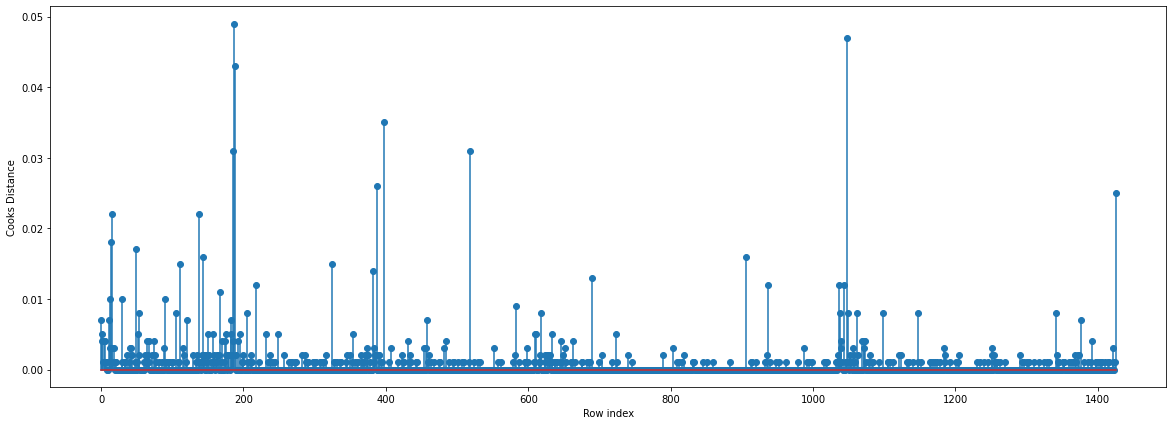

In [ ]:

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car6)),np.round(c_c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
# maximum point is less than 1 so we stop with outlier elimination
(np.argmax(c_c),np.max(c_c))


(187, 0.04878961446535984)

# ***model prediction***

In [ ]:
abc=pd.DataFrame({'p':5555,'a':99,'KM':6000,'HP':2000,'cc':3000,'d':2,'g':7,'tax':1,'w':1000},index=[1])

In [ ]:
aa=model5.predict(abc)

In [ ]:
print('price of new car is'),aa

price of new car is


(None, 1    63937.547441
 dtype: float64)